# Classification between Two Classes
In this exercise, we will learn how to perform a binary classification.

## Introduction
You are given data from two classes. In each class the data follows a distribution out of one or many gaussian distributions with class dependent parameters. Your task is to build a model which can classify between the two classes.

## Imports and Seeding
First we will do the necessary imports:
* `numpy` for general data handling and array manipulation
* `tensorflow` to build and train the regression model
* `matplotlib.pyplot` for plotting
* `sklearn.utils.shuffle` to randomly shuffle our training dataset
* `cycler.cycler` helps with plotting multiple distributions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from cycler import cycler

Then we set a random seed for the `np.random` module. This makes our code reproducible as the random operations will yield the same results in every run through the notebook.

In [2]:
np.random.seed(42)

## Data Creation
First we will create the data.

To make things a little bit more interesting we have written a small piece of code, which creates `N_DIM` dimensional data following distributions consiting of one or more (`N_PEAK`) different Gaussian functions. Increasing the number of `N_PEAK` will in general make the distributions and thus the task more complex.

In [3]:
N_DIMS = 1
N_PEAK = 1
SCALE = 0.1

centers_class_1 = np.random.uniform(0, 1, size=(N_PEAK, N_DIMS))
centers_class_2 = np.random.uniform(0, 1, size=(N_PEAK, N_DIMS))

def make_samples(centers, n_samples=1_000):
    output = []
    for i, center in enumerate(centers):
        output.append(np.random.normal(
            loc=center,
            scale=SCALE,
            size=(n_samples // N_PEAK, N_DIMS)
        ))
    return np.concatenate(output)

class_1 = make_samples(centers_class_1, 100_000)
class_2 = make_samples(centers_class_2, 100_000)

## Data Visualization
Visualize the data. When looking at one dimension (`N_DIMS=1`) a single histogram will solve the task. If plotting many dimensions (`N_DIMS>1`) you may want to plot 1-dimensional projections onto each of the axes.

/var/folders/dw/z8g0cw_s0nzcv0z1jn7vfgsm0000gn/T/ipykernel_2041/288129882.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


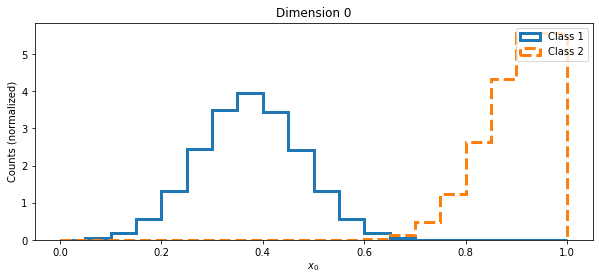

In [4]:
"""
TODO: Visualize the data of the two classes.
Wou may want to plot all 1-dimensional projections of the `N_DIM` dimensions of our data.
"""
for d0 in range(N_DIMS):
    fig, axs = plt.subplots(figsize=(10,4))
    for opts in cycler(
        x=[class_1, class_2],
        label=["Class 1","Class 2"],
        linestyle=["-", "--"],
    ):
        axs.hist(
            opts.pop("x")[:, d0],
            **opts,
            bins=20,
            range=[0, 1],
            density=True,
            histtype="step",
            lw=3,
        )
    axs.legend(loc=0)
    axs.set_title(f"Dimension {d0}")
    axs.set_xlabel(rf"$x_{{{d0}}}$")
    axs.set_ylabel(f"Counts (normalized)")
    fig.show()
    plt.savefig("plot.pdf")

## Data Preparation
Next we prepare the training data.
We built one dataset made out of both classes.

The `x` values of the training data are given by the distributions themselves

For the `y` values we use ones for `class_1` and zeros for`class_2`.

In [5]:
x = np.concatenate((class_1, class_2))
y = np.concatenate((np.ones(len(class_1)), np.zeros(len(class_2))))[..., None]

Next we suffle our dataset. This prevents the case that during training the network only sees one type of events in a particular or even many subsequent batches.

In [6]:
x, y = shuffle(x, y, random_state=0)

## Model Creation
Next we will create the model.
- What is a suitable size?
- How many inputs and outputs does the model need?
- What are suitable activations?
    - Hint: Think about the activation of the last layer.

In [7]:
"""
TODO: Create the model
"""
model = tf.keras.Sequential(
    layers=[
        tf.keras.Input(shape=(N_DIMS,)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

2022-08-05 12:03:31.241346: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now compile the model:
- Which loss function should be used? ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses))
- Which optimizer should be used?

In [8]:
"""
TODO: Compile the model
"""
model.compile(optimizer="SGD", loss="bce", metrics=["accuracy"])

Next we inspect our model. How many parameteres does it have?

In [9]:
"""
TODO: Use model.summary() to look at number of parameters
"""
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 132,353
Trainable params: 132,353
Non-trainable params: 0
_________________________________________________________________


## Model Training
Now train the model:
* What is a suitable number of epochs?
* What is a suitable size for the batches?

In [10]:
"""
TODO: Train the model
"""
model.fit(x, y)

2022-08-05 12:03:31.387168: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


6250/6250 [==============================] - 20s 3ms/step - loss: 0.2305 - accuracy: 0.9128


## Model Evaluation
Visualize the model prediction. Describe your observation.

In [11]:
"""
TODO: Prepare data for the model evaluation/prediction
"""
n = 100
s = np.linspace(0, 1, n)
xy = np.meshgrid(*(N_DIMS * [s]), indexing="ij")
xy = np.concatenate(tuple(x[..., None] for x in xy), axis=-1)

In [12]:
"""
TODO: Perform the model evaluation/prediction
"""
xy = xy.reshape(-1, N_DIMS)
y_pred = model.predict(xy)
y_pred = y_pred.reshape(*(n for i in range (N_DIMS)), 1)

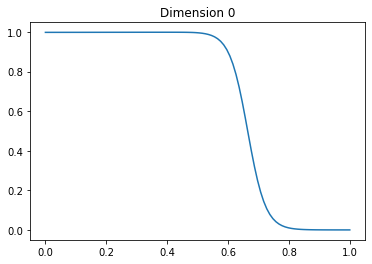

In [13]:
"""
TODO: Visualize the model evaluation/prediciton
"""
for i in range(N_DIMS):
    _y_pred = y_pred.mean(axis=tuple(set(range(N_DIMS))-{i}))
    plt.plot(s, _y_pred)
    plt.title(f"Dimension {i}")
    plt.show()

## Futher Tasks
Now we will make our exercise more difficult:
* Make the functions more complex (N_PEAK) and train the classifier again. Describe your observations.
* Raise the number of dimensions (N_DIM) to 2 (and 10) and train the classifier again. Describe your observations.

## Summary
This concludes our tutorial on the Classification between Two Classes.

In this tutorial you have learned:
* How to visualize n-dimensional data distributions from two classes
* How to prepare the data for a classification
* How to create a neural network for a classification
* Which loss to use for a classification
* How to interpret the output of a classification network
* The strenghts and limits of a simple network and a simple optimizer according to:
    * Number of dimensions
    * Complexity of functions